# Logistic Regression
- This notebook contains the code to implement the Logistic Regression algorithm from scratch using `Gradient Descent`
- By default, Logistic Regression is better used for solving `binary classification` problems
 - It can however handle multi-class cases via techniques like `one-versus-all` or `one-versus-one`
- `Softmax Regression` is an extension of Logistic Regression which can be used to solve multi-class classification problems directly

## Importing Libraries

In [ ]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# timing
from timeit import default_timer as timer

## Custom Class

In [ ]:
class LogisticRegression:

  def __init__(self,
               eta=1.0,
               eta_d=10,
               tol=1e-3,
               epsilon=1e-5,
               n_epochs=100,
               random_state=None):
    """
    Parameters:
    -----------

    eta: float
         Used in the learning rate for gradient descent

    eta_d: int
           Used in learning schedule for updating the learning rate for gradient descent

    tol: float
         For checking convergence of gradient descent

    epsilon: float
             Added to the arguments in log function to avoid errors

    n_epochs: int
              The total no. of iterations to run the gradient descent algorithm

    random_state: int
                  For controlling the randomness and reproducibility of results across multiple runs
    """
    self.eta = eta
    self.eta_d = eta_d
    self.n_epochs = n_epochs
    self.epsilon = epsilon
    self.tol = tol
    self.random_state = random_state


  def _sigmoid(self, a):
    return 1 / (1 + np.exp(-a))


  def _linear_activation(self, a):
    return np.dot(a, self.w_) + self.b_


  def _learning_schedule(self, i):
    # this function updates the learning rate of gradient descent at every iteration
    # for improving chances of convergence at global minimum and avoid local minima
    return self.eta / (self.eta_d + i)


  def _display_details(self, message, start, end):
    print("> Successfully trained Logistic Regression Model!\n")
    print("> Training Summary:")
    print(f"  - {message}")
    print(f"  - {'Time Taken':<12}: {end - start:,.3f}s")
    print(f"  - {'Bias':<12}: {self.b_}")
    print(f"  - {'Coefficients':<12}: {self.w_}\n")


  def _display_training(self):
    # this function plots the result of gradient descent
    x_range = np.arange(1, len(self.costs_) + 1)
    plt.figure(figsize=(6, 4))
    plt.plot(x_range,
             self.costs_,
             linewidth=2)
    plt.xlabel("No. of Iterations")
    plt.ylabel("Cost")
    plt.title("Gradient Descent")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


  def fit(self, X, y):
    # this function trains a logistic regression model
    if self.random_state:
      np.random.seed(self.random_state)

    n, p = X.shape
    self.b_ = np.random.rand()
    self.w_ = np.random.rand(p)
    self.costs_ = []

    prev_J = np.inf
    start_time = timer()
    for i in range(self.n_epochs):
      z = self._linear_activation(X)
      p = self._sigmoid(z)
      error = y - p

      # computing the cost
      J =  -((y * np.log(p + self.epsilon)) + ((1 - y) * np.log(1 - p + self.epsilon))).mean()
      if np.abs(prev_J - J) <= self.tol:
        end_time = timer()
        self._display_details(f"The algorithm converged in {i + 1} iterations",
                              start_time,
                              end_time)
        break
      prev_J = J
      self.costs_.append(J)

      # computing the gradients
      dJ_dw = (-1 / n) * np.dot(X.T, error)
      dJ_db = -error.mean()

      # updating the weights
      alpha = self._learning_schedule(i + 1)
      self.w_ -= (alpha * dJ_dw)
      self.b_ -= (alpha * dJ_db)

    if i == self.n_epochs - 1:
      end_time = timer()
      self._display_details(f"The algorithm ran all {self.n_epochs} iterations",
                            start_time,
                            end_time)
    return self


  def predict_proba(self, X):
    # this function will return predicted probabilities
    z = self._linear_activation(X)
    p = self._sigmoid(z)
    return np.c_[1 - p, p]


  def predict(self, X):
    # this function will return predicted labels
    return np.argmax(self.predict_proba(X), axis=1)


  def score(self, X, y):
    # this function will return the accuracy of the model
    y_pred = self.predict(X)
    return (y == y_pred).mean()

## Getting the Data

In [ ]:
X, y = load_iris(return_X_y=True)
y = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=7)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


## Training the Model

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

> Successfully trained Logistic Regression Model!

> Training Summary:
  - The algorithm converged in 71 iterations
  - Time Taken  : 0.007s
  - Bias        : 0.6796679092256154
  - Coefficients: [-0.13357844  0.48764701 -0.60830411 -0.21395099]



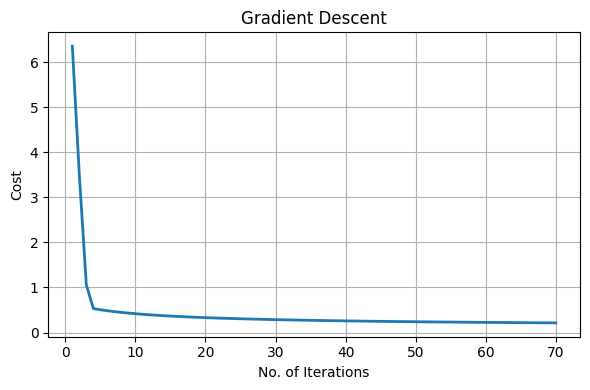

In [ ]:
lr._display_training()

## Evaluating the Model

In [ ]:
lr.score(X_train, y_train)

1.0

In [ ]:
lr.score(X_test, y_test)

1.0

## Final Remarks:
- The Logistic Regression algorithm was successfully implemented from scratch using Python
- The model performs very well on the `Iris flowers` dataset
- Results may vary by using different values for class parameters like `eta`, `random_state` and `tol`